# アミノ酸配列のグラフ表示画像のTransformerによるタンパク質ファミリー分類（5分割交差検証）

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [4]:
from torch.utils.data import Dataset
from PIL import Image

import os

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)

        return {
            "pixel_values": image,
            "label": label
        }

## 2. 画像前処理（ViT用）

In [5]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
# from transformers import AutoImageProcessor
from transformers import ViTImageProcessorFast, ViTForImageClassification

processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224-in21k")
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_11508\1019390587.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.263807,0.926813,0.922609
2,No log,0.216066,0.939767,0.936938
3,0.276400,0.158389,0.961140,0.958514
4,0.276400,0.139040,0.963083,0.961815
5,0.276400,0.121209,0.970207,0.969370
6,0.067300,0.136531,0.968912,0.967586
7,0.067300,0.138783,0.965026,0.964204
8,0.028100,0.116949,0.974093,0.973974
9,0.028100,0.121318,0.970855,0.970608
10,0.028100,0.117386,0.972798,0.972614


Fold 1 F1 Score: 0.9726
Confusion Matrix:
 [[1036    2   16    0    2]
 [   7   85    2    0    0]
 [   9    2  377    0    0]
 [   0    0    2    1    0]
 [   0    0    0    0    3]]
              precision    recall  f1-score      support
A              0.984791  0.981061  0.982922  1056.000000
B              0.955056  0.904255  0.928962    94.000000
C              0.949622  0.971649  0.960510   388.000000
D              1.000000  0.333333  0.500000     3.000000
E              0.600000  1.000000  0.750000     3.000000
accuracy       0.972798  0.972798  0.972798     0.972798
macro avg      0.897894  0.838060  0.824479  1544.000000
weighted avg   0.973425  0.972798  0.972614  1544.000000


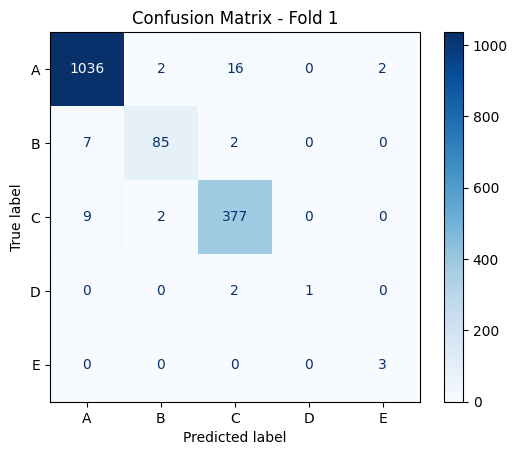

[Fold 2 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_11508\1019390587.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.233741,0.942968,0.940408
2,No log,0.158940,0.957874,0.955971
3,0.274900,0.185783,0.951393,0.949743
4,0.274900,0.168037,0.955930,0.955763
5,0.274900,0.201270,0.952690,0.950934
6,0.061700,0.168732,0.961115,0.961087
7,0.061700,0.164967,0.963707,0.963225
8,0.022000,0.161216,0.962411,0.962083
9,0.022000,0.182178,0.961763,0.961232
10,0.022000,0.177669,0.962411,0.961969


Fold 2 F1 Score: 0.9620
Confusion Matrix:
 [[1048    7   10    0    0]
 [  11   83    2    0    0]
 [  19    6  350    1    0]
 [   0    0    2    0    0]
 [   0    0    0    0    4]]
              precision    recall  f1-score      support
A              0.972171  0.984038  0.978068  1065.000000
B              0.864583  0.864583  0.864583    96.000000
C              0.961538  0.930851  0.945946   376.000000
D              0.000000  0.000000  0.000000     2.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.962411  0.962411  0.962411     0.962411
macro avg      0.759658  0.755894  0.757719  1543.000000
weighted avg   0.961698  0.962411  0.961969  1543.000000


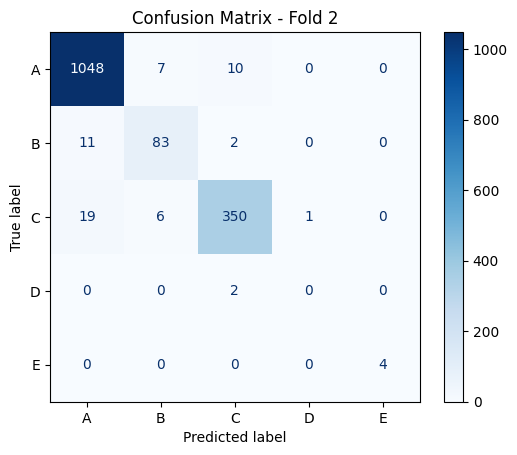

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_11508\1019390587.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.261145,0.927414,0.922549
2,No log,0.242950,0.930006,0.927364
3,0.273400,0.194243,0.954634,0.951330
4,0.273400,0.246210,0.938432,0.935258
5,0.273400,0.198496,0.952690,0.952116
6,0.063600,0.186919,0.957874,0.958345
7,0.063600,0.194890,0.959170,0.959685
8,0.022700,0.189228,0.958522,0.959431
9,0.022700,0.203101,0.957226,0.957727
10,0.022700,0.191476,0.957874,0.958693


Fold 3 F1 Score: 0.9587
Confusion Matrix:
 [[1041    2   14    0    0]
 [   9   74   12    0    0]
 [  15    3  360    6    0]
 [   0    0    0    0    0]
 [   1    0    3    0    3]]
              precision    recall  f1-score      support
A              0.976548  0.984863  0.980688  1057.000000
B              0.936709  0.778947  0.850575    95.000000
C              0.925450  0.937500  0.931436   384.000000
D              0.000000  0.000000  0.000000     0.000000
E              1.000000  0.428571  0.600000     7.000000
accuracy       0.957874  0.957874  0.957874     0.957874
macro avg      0.767741  0.625976  0.672540  1543.000000
weighted avg   0.961485  0.957874  0.958693  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


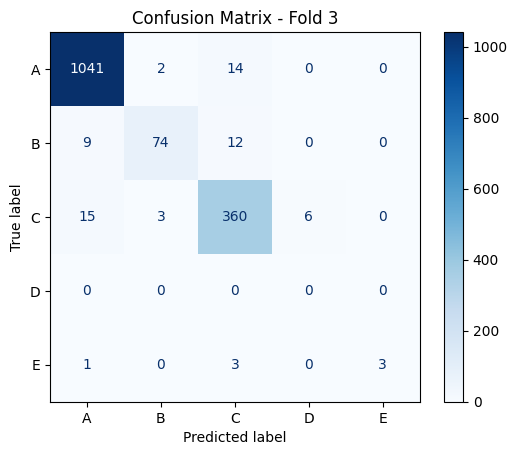

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_11508\1019390587.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.268406,0.929358,0.925933
2,No log,0.218935,0.938432,0.937761
3,0.278600,0.186334,0.947505,0.945938
4,0.278600,0.207267,0.952041,0.950430
5,0.278600,0.206850,0.956578,0.954636
6,0.060900,0.214986,0.955930,0.953828
7,0.060900,0.215254,0.957226,0.956097
8,0.021900,0.221765,0.955930,0.955245
9,0.021900,0.219762,0.955282,0.954878
10,0.021900,0.227510,0.954634,0.954042


Fold 4 F1 Score: 0.9540
Confusion Matrix:
 [[1045    2   16    0    0]
 [   8   67    2    0    0]
 [  30    5  359    3    0]
 [   0    0    4    1    0]
 [   0    0    0    0    1]]
              precision    recall  f1-score      support
A              0.964912  0.983067  0.973905  1063.000000
B              0.905405  0.870130  0.887417    77.000000
C              0.942257  0.904282  0.922879   397.000000
D              0.250000  0.200000  0.222222     5.000000
E              1.000000  1.000000  1.000000     1.000000
accuracy       0.954634  0.954634  0.954634     0.954634
macro avg      0.812515  0.791496  0.801285  1543.000000
weighted avg   0.953820  0.954634  0.954042  1543.000000


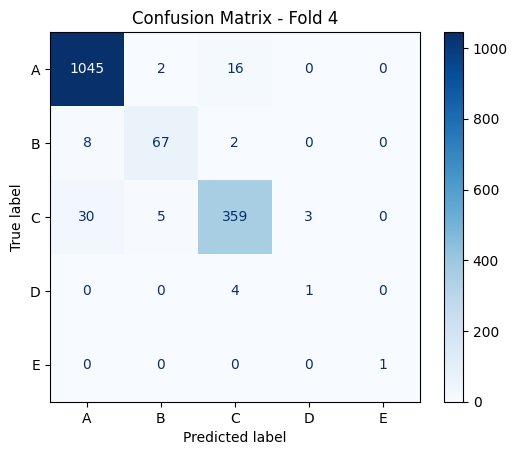

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_11508\1019390587.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.295119,0.912508,0.912291
2,No log,0.152931,0.961115,0.958940
3,0.277600,0.146665,0.959819,0.957552
4,0.277600,0.139502,0.964355,0.962849
5,0.277600,0.137907,0.962411,0.961300
6,0.066400,0.142130,0.968244,0.967421
7,0.066400,0.143929,0.967596,0.966514
8,0.023500,0.145030,0.968892,0.967861
9,0.023500,0.145341,0.968892,0.967854
10,0.023500,0.146343,0.968244,0.967261


Fold 5 F1 Score: 0.9673
Confusion Matrix:
 [[1041    5   15    0    0]
 [   4   80    8    0    0]
 [  12    2  370    0    0]
 [   1    0    2    0    0]
 [   0    0    0    0    3]]
              precision    recall  f1-score      support
A              0.983932  0.981150  0.982539  1061.000000
B              0.919540  0.869565  0.893855    92.000000
C              0.936709  0.963542  0.949936   384.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.968244  0.968244  0.968244     0.968244
macro avg      0.768036  0.762851  0.765266  1543.000000
weighted avg   0.966459  0.968244  0.967261  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


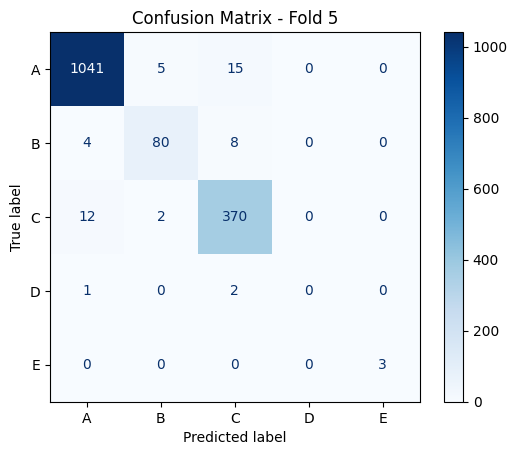


Average F1 Score: 0.962915684643453
Confusion Matrix:
 [[5211   18   71    0    2]
 [  39  389   26    0    0]
 [  85   18 1816   10    0]
 [   1    0   10    2    0]
 [   1    0    3    0   14]]


In [11]:
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
import evaluate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from torch.utils.data import Subset
import pandas as pd

accuracy = evaluate.load("accuracy")

# 5分割交差検証の設定
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

dataset = GPCRImageDataset("gpcr_labels.csv", "./graphs", transform=transform)

all_f1_scores = []
all_conf_matrices = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # モデルを毎回初期化
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"./vit-gpcr-fold{fold}",
        per_device_train_batch_size=32,
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=10,
        logging_dir="./logs",
        report_to="none"
    )

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        f1 = f1_score(labels, preds, average="weighted")
        return {
            "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
            "f1": f1
        }

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # 推論 & 評価
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    # ラベルIDのリストを明示的に渡す
    label_ids = list(range(len(label2id)))  # [0, 1, 2, 3, 4]
    display_names = list(label2id.keys())  # ["A", "B", "C", "D", "E"]

    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred, labels=label_ids)

    report = classification_report(y_true, y_pred, target_names=display_names, output_dict=True)
    report_df = pd.DataFrame(report).T

    print(f"Fold {fold+1} F1 Score: \033[32m{f1:.4f}\033[0m")
    print("Confusion Matrix:\n", cm)
    print(report_df)

    all_f1_scores.append(f1)
    all_conf_matrices.append(cm)

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

# 最終結果をまとめる
print("\nAverage F1 Score:", np.mean(all_f1_scores))
print("Confusion Matrix:\n", sum(all_conf_matrices))